# Classification of Images: Convolutional Neural Network (CNN) and its Interpretation

In this notebook, a CNN is trained to classify the images of CIFAR-10 dataset. The explanation of the implementation of neural networks in Keras can be found in my previous notebook (https://github.com/avarna/BlogNotebooks/blob/master/2017_11_mnist_denseNN.ipynb) due to which a detailed explanation will be avoided here. 

In [1]:
import numpy as np
np.random.seed(123)    

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten    
from keras.layers import Convolution2D, MaxPooling2D    
from keras.utils import np_utils    

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/Users/av/Desktop/DataMining/myPythonFunctions')

from gradcam import *

Using TensorFlow backend.


Number of samples in training set= 50000 
 Pixels = 32 x 32


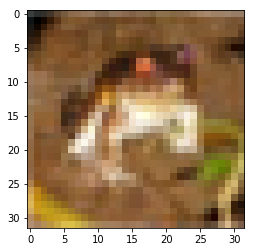

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ('Number of samples in training set=', 
       len(X_train), '\n Pixels =', X_train.shape[1], 'x', X_train.shape[2])

plt.imshow(X_train[0])    # Plot the first sample: sanity check
plt.show()

In [3]:
# STEP 1: Preprocess input data

# Convert data type to float32 and normalize to the range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



# STEP 2: Preprocess class labels

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 

    
# STEP 3: Define model architecture

model = Sequential() 

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 

# OUTPUT Dense layer: size=10, corresponding to 10 classes
model.add(Dense(10, activation='softmax'))    



# STEP 4: Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



# STEP 5: Fit model on training data
model.fit(X_train, Y_train, batch_size=256, epochs=4,  validation_split=0.2, verbose=1)



# STEP 6: Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para


 Truth= 3

 Multi-class: Prediction= 3 



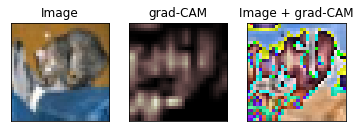


 Truth= 8

 Multi-class: Prediction= 8 



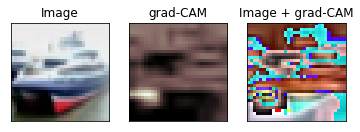


 Truth= 8

 Multi-class: Prediction= 8 



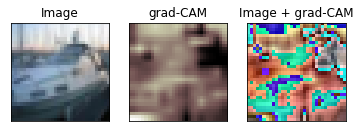


 Truth= 0

 Multi-class: Prediction= 0 



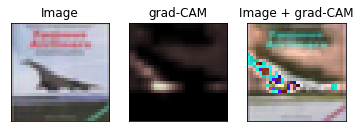


 Truth= 6

 Multi-class: Prediction= 4 



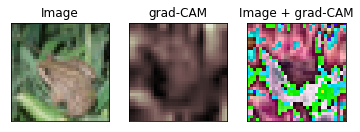


 Truth= 6

 Multi-class: Prediction= 6 



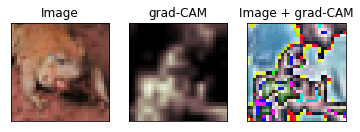


 Truth= 1

 Multi-class: Prediction= 1 



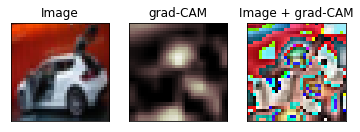


 Truth= 6

 Multi-class: Prediction= 6 



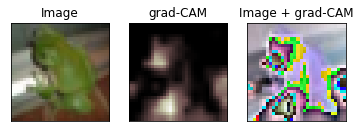


 Truth= 3

 Multi-class: Prediction= 3 



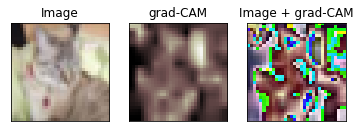


 Truth= 1

 Multi-class: Prediction= 1 



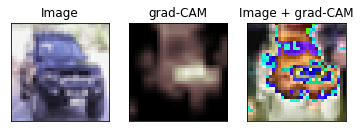

In [4]:
# Visualization of grad-CAM from the test set
for i in range(10):

    print('\n Truth=', np.argmax(Y_test[i]))
    gradcam_img(X_test[i], model)

## Class labels

Source: https://www.cs.toronto.edu/~kriz/cifar.html

Class 0 = airplane
<br>
Class 1 = automobile
<br>
Class 2 = bird
<br>
Class 3 = cat
<br>
Class 4 = deer
<br>
Class 5 = dog
<br>
Class 6 = frog
<br>
Class 7 = horse
<br>
Class 8 = ship
<br>
Class 9 = truck

## Discussion

The accuracy of the CNN trained in this notebook is around 61% on the test set. The accuracy can be improved by training the model for a longer time (increase epochs) and by using more convolutional layers. The main aim of this notebook is to show that the CNNs are explainable and further improvement of the model is avoided.

The class activation map (CAM) is helpful in identifying the parts of the image that influenced the classfication decision. CAMs can be used for debugging the CNNs. A special type of CAM called grad-CAM is used in this work. The implementation is in the "gradcam.py" file and I won't share it due to copyright issues (this implementation can be found in the textbook by F. Chollet, "Deep Learning with Python"). The description of grad-CAM used in this work can be found in https://arxiv.org/abs/1610.02391. The open-source implementation of grad-CAM can be found in https://github.com/jacobgil/keras-grad-cam/blob/master/grad-cam.py (bit harder to understand than the one in the textbook). 

The lighter parts of CAMs are the regions used by the CNN to classify the images. For instance, in the last image, the front region of the jeep is highlighted more in the CAM. This means that the CNN is classifying this image as an "automobile" based on the front region of the jeep (and not based on the tyres or the side regions). The fourth image which shows a frog is misclassified as a deer because the classification decision is based on the background of the frog (grass) and not the features of the frog. Probably, the photos of deer are always with grass in the background and my CNN model misjudged this image of the frog. This indicates that the CNN should be trained longer (increase epochs) and with more convolutional layers so that the subtles features can be captured by the CNN model.